<img src="img/Act2_Pic01_Short.png">

<img src="img/Act2_Pic02_Alt.png">

### Setup

In [ ]:
import arcpy
import arcgis
import pandas as pd
import os

In [ ]:
gis = arcgis.gis.GIS(url="https://ndirt.maps.arcgis.com", username="ANieto_ndirt")

In [ ]:
bridge_item = gis.content.search("DCVAMD_NBI_Bridges", item_type="feature service")[0]
bridge_item

In [ ]:
deficient_bridge_item = gis.content.search("DCVAMD_CBSA_DeficientBridges", item_type="feature service")[0]
deficient_bridge_item

<Item title:"DCVAMD_CBSA_DeficientBridges_Analyzed" type:Feature Layer Collection owner:ANieto_ndirt>
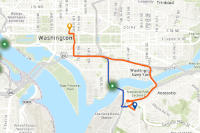

In [47]:
analyzed_bridges_item = gis.content.search("DCVAMD_CBSA_DeficientBridges_Analyzed", item_type="feature service")[0]
analyzed_bridges_item

In [ ]:
commute_df = pd.DataFrame.from_csv("commute_table.csv")

In [ ]:
tract_polys = gis.content.search("DCVAMD_CBSA_Tracts_Polygons", item_type="feature service")[0]
tract_points = gis.content.search("DCVAMD_CBSA_Tracts_Centroids", item_type="feature service")[1]

In [ ]:
tract_polys

In [ ]:
tract_points

In [ ]:
route_items = gis.content.search("Test Routes", item_type="feature service")
origin_dest_points = route_items[0]
normal_route = route_items[2]
impaired_route = route_items[1]

In [ ]:
normal_route

In [ ]:
impaired_route

In [ ]:
import time

def animate_layer_addition_to_map(map_widget, list_of_items, zoom_level, basemap='gray-vector'):
    # The map widget
    m = map_widget
    m.basemap = basemap
    
    # 1. Parse the find-routes analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    lines_df = result.output_routes.df
    lines_fset = arcgis.features.FeatureSet.from_dataframe(lines_df)
    
    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.7}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    time.sleep(1.5)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_4)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_2)
    m.draw(shape=result.output_routes, symbol=allocation_line_symbol_1)
    
    m.add_layer(stops_layer)
    
    m.zoom = zoom_level

# Let's Explore our Data

### Exploring Bridge Data

Structurally Deficient Bridges in our Area

In [38]:
deficient_bridges_map = gis.map('Fairfax County', zoomlevel=8)
deficient_bridges_map.basemap = 'gray-vector'
display(deficient_bridges_map)
deficient_bridges_map.add_layer(deficient_bridge_item)

### Exploring Commuting Data

Table of Commuting Patterns by Tract

In [39]:
commute_df

,OBJECTID,EST,MOE,RES_STATE,WORK_STATE,RESIDENCE_TRACT,WORK_TRACT,ORIGIN_DESTINATION_ID
0,1,1630,444,1,1,1089011100,1089011100,01089011100 - 01089011100
1,2,1300,340,1,1,1003011502,1003011502,01003011502 - 01003011502
2,3,1070,209,1,1,1051030400,1051030400,01051030400 - 01051030400
3,4,1055,263,1,1,1081041100,1081041100,01081041100 - 01081041100
4,5,1055,330,1,1,1115040501,1115040501,01115040501 - 01115040501
5,6,995,214,1,1,1043964900,1043964900,01043964900 - 01043964900
6,7,925,208,1,1,1089010501,1089001402,01089010501 - 01089001402
7,8,925,199,1,1,1089010621,1089001402,01089010621 - 01089001402
8,9,890,262,1,1,1009050102,1009050102,01009050102 - 01009050102
9,10,885,219,1,1,1003010703,1003010703,01003010703 - 01003010703


Map of all DC CBSA Tracts

In [40]:
tracts_map = gis.map('Arlington, VA', zoomlevel=9)
tracts_map.basemap = 'streets-night-vector'
display(tracts_map)

In [41]:
tracts_map.add_layer(tract_points)

Map of a few representative commute routes

# Let's use Spatial Analysis to find the most important bridges for DC's commuters...

<img src="img/odmc_restriction_01.png">

### Exploring a Commuting Interaction With an Impaired Bridge

In [42]:
m2 = gis.map('Washington Navy Yard', zoomlevel=12)
m2.basemap = 'gray-vector'
display(m2)
m2.add_layer(origin_dest_points)

In [43]:
m2.add_layer(normal_route)

In [45]:
m2.add_layer(deficient_bridge_item)

In [46]:
m2.add_layer(impaired_route)

##### This difference in the route, magnified by how many people have to resort to each new route, can be tied to the relative importance of each bridge.

##### This shows an example of a single commute affected by the potential loss of this bridge. To better understand the overall impacts to all bridge infrastructure in DC, we can prototype and implement an automated version of this analysis, using the ArcGIS API for Python. 

# Spatial Analysis from the Notebook

### Process Workflow

<img src="img/Analysis_Process.png">

### 1. Set Environment and Retrieve Bridge and Commute Pattern Data

In [ ]:
# Set workspace
processing_workspace = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\bridge_processing"
workspace_gdb = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\BridgeCriticality_Arcpy_Workspace.gdb"
# workspace_gdb = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\BridgeCriticality_Arcpy_Workspace.gdb"

# Set Arcpy environment
arcpy.env.workspace = workspace_gdb
arcpy.env.overwriteOutput = True

# Set reference to origins
origin_tracts = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\BridgeCriticality_Arcpy_Workspace.gdb\DCVAMD_CBSA_Tracts_Centroids"
# origin_tracts = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_Tracts_Centroids"
origins_id_field = "ID"
origins_name_field = "NAME"

# Set reference to destinations
dest_tracts = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\BridgeCriticality_Arcpy_Workspace.gdb\DCVAMD_CBSA_Tracts_Centroids"
# dest_tracts = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_Tracts_Centroids"
dest_id_field = "ID"
dest_name_field = "NAME"

# Set reference to bridges
bridges_fc = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_DeficientBridges"
polybarrier_bridges_fc = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\DCVAMD_CBSA_DeficientBridges_Polybarriers"
polybarriers_id_field = "OBJECTID"

# Set reference to the network dataset
network_dataset = "C:\\ArcGIS\\Business Analyst\\US_2015\\Data\\Streets Data\\NAVTEQ_2014_Q3_NA.gdb\\Routing\\Routing_ND"

# Set reference to commute table
commute_table = "C:\\Users\\albe9057\\Documents\\ANieto_SolutionEngineering\\Projects\\FedGIS\\FedGIS_2018\\Plenary_ArcGISAPIforPython\\Work\\Bridge_Criticality_Analysis\\Bridge_Criticality_Analysis.gdb\\ctpp_journey_to_work"

# Set reference to impedance values needed for odcm
impedance_value=99999
impedance_attribute="Minutes"
accumulate_attributes = ["Minutes", "Miles"]

### 2. Perform Bridge Commuting Impacts Analysis

In [ ]:
arcgis.network.analysis.generate_origin_destination_cost_matrix?

Run ODCM for Nominal Commute

In [ ]:
if os.path.isfile("nominal_odcm.csv"):
    print("Found nominal ODCM. Using processed data...")
    nominal_odcm_df = pd.DataFrame.from_csv("nominal_odcm.csv")
    
else:

    # Run nominal ODCM using tracts to tracts
    nominal_odcm = create_odcm(gdb=workspace_gdb,
                               origins_fc=origin_tracts,
                               origins_id_field=origins_id_field,
                               origins_name_field=origins_name_field,
                               destinations_fc=dest_tracts,
                               destinations_id_field=dest_id_field,
                               destinations_name_field=dest_name_field,
                               odcm_name="nominal_baseline",
                               network_dataset=network_dataset,
                               impedance_value=impedance_value,
                               impedance_attribute=impedance_attribute,
                               accumulate_attribute_name=accumulate_attributes,
                               polybarrier_fc=None,
                               polybarrier_id_field=None,
                               polybarrier_name_field=None,
                               impedance_attribute_field_name="Dij",
                               use_lines=False,
                               out_na_layer_name="Origins2Destinations",
                               validate_inputs=False,
                               method_message="create_odcm: ",
                               output_origin_id_field_name='origin_id',
                               output_origin_name_field_name='origin_name',
                               output_dest_id_field_name='destination_id',
                               output_dest_name_field_name='destination_name',
                               logger_object=None)

    # Convert the odcm gis table to a pandas dataframe
    print("Calculating ID Fields...")
    nominal_odcm_df = convert_gis_table_to_pddataframe(nominal_odcm)
    nominal_odcm_df['OriginID'] = nominal_odcm_df.apply(lambda row: get_origin_id_from_odid(row['Name']), axis=1)
    nominal_odcm_df['DestinationID'] = nominal_odcm_df.apply(lambda row: get_dest_id_from_odid(row['Name']), axis=1)
    nominal_odcm_df.to_csv("nominal_odcm.csv")

nominal_odcm_df.head()

Run Iteration: For each Bridge, Run ODCM with Bridge Feature as a Barrier in the ODCM

In [ ]:
# Set iteration: Structurally Deficient Bridges in DC Metropolitan Region from NBI data

# Build list of buffered bridges
bridges_list = [row[0] for row in arcpy.da.SearchCursor(polybarrier_bridges_fc, polybarriers_id_field)]

# Make bridges processing directory
bridge_dir_path = r"D:\ANieto_SolutionEngineer\Projects\FedGIS\ArcGISAPIforPython_Workspace\bridge_processing"

if not os.path.isdir(bridge_dir_path):
    os.mkdir(bridge_dir_path)
    brigde_dir = bridge_dir_path
else:
    bridge_dir = bridge_dir_path

os.chdir(bridge_dir)

# For each bridge
for bridge in bridges_list:
    
    print("\nChecking bridge {0} of {1}...".format(str(bridge), str(len(bridges_list))))
    if os.path.isfile("impacted_commuters_odcm_{0}.csv".format(str(bridge))):
        print("Found bridge. Using processed data...")
        impacted_commuters_df = pd.DataFrame.from_csv("impacted_commuters_odcm_{0}.csv".format(str(bridge)))

    else:

        print("\nProcessing bridge {0} of {1}...".format(str(bridge), str(len(bridges_list))))
        # Set where clause
        bridge_sql = "{0} = {1}".format(arcpy.AddFieldDelimiters(polybarrier_bridges_fc, polybarriers_id_field), bridge)

        # Export feature to act as a single polyline barrier
        polybarrier_bridge_fc = arcpy.Select_analysis(polybarrier_bridges_fc, "{0}/Bridge_{1}".format(workspace_gdb, str(bridge)), bridge_sql)

        # Run impaired ODCM using tracts to tracts, using a bridge feature as a polygon barrier
        impaired_odcm = create_odcm(gdb=workspace_gdb,
                                origins_fc=origin_tracts,
                                origins_id_field=origins_id_field,
                                origins_name_field=origins_name_field,
                                destinations_fc=dest_tracts,
                                destinations_id_field=dest_id_field,
                                destinations_name_field=dest_name_field,
                                odcm_name="impaired_test",
                                network_dataset=network_dataset,
                                impedance_value=impedance_value,
                                impedance_attribute=impedance_attribute,
                                accumulate_attribute_name=accumulate_attributes,
                                polybarrier_fc=polybarrier_bridge_fc,
                                polybarrier_id_field=polybarriers_id_field,
                                polybarrier_name_field="ITEM6A",
                                impedance_attribute_field_name="Dij",
                                use_lines=False,
                                out_na_layer_name="Origins2Destinations",
                                validate_inputs=False,
                                method_message="create_odcm: ",
                                output_origin_id_field_name='origin_id',
                                output_origin_name_field_name='origin_name',
                                output_dest_id_field_name='destination_id',
                                output_dest_name_field_name='destination_name',
                                logger_object=None)

        # Convert the odcm gis table to a pandas dataframe
        impaired_odcm_csv = gis_table_to_csv(impaired_odcm, bridge_dir, "impaired_odcm_{0}.csv".format(str(bridge)))
        impaired_odcm_df = pd.DataFrame.from_csv(impaired_odcm_csv)
        
#         impaired_odcm_df = convert_gis_table_to_pddataframe(impaired_odcm)
        impaired_odcm_df['OriginID'] = impaired_odcm_df.apply(lambda row: get_origin_id_from_odid(row['Name']), axis=1)
        impaired_odcm_df['DestinationID'] = impaired_odcm_df.apply(lambda row: get_dest_id_from_odid(row['Name']), axis=1)
        impaired_odcm_df.to_csv("impaired_odcm_{0}.csv".format(str(bridge)))

        # Join nominal and impaired ODCM dataframes
        nom_imp_odcm_df = pd.merge(nominal_odcm_df, impaired_odcm_df, how="left", on="Name")

        # Join nominal+impaired ODCM dataframe to commute dataframe (inner join; remove anything not common)
        commute_impacts_df = pd.merge(commute_df, nom_imp_odcm_df, how="inner", left_on="ORIGIN_DESTINATION_ID", right_on="Name")
        commute_impacts_df.to_csv("commute_impacts_odcm_{0}.csv".format(str(bridge)))

        # Identify deltas in impedance
        commute_impacts_df['minutes_diff'] = commute_impacts_df['Total_Minutes_x'] - commute_impacts_df['Total_Minutes_y']
        commute_impacts_df['miles_diff'] = commute_impacts_df['Total_Miles_x'] - commute_impacts_df['Total_Miles_y']
        impacted_commuters_df = commute_impacts_df.loc[commute_impacts_df['minutes_diff'] > 0]
        impacted_commuters_df.to_csv("impacted_commuters_odcm_{0}.csv".format(str(bridge)))

    # Calculate count and impedance sum in deltas
    routes_impacted = impacted_commuters_df.shape[0]
    commuters_impacted = commuters_impacted = impacted_commuters_df['EST'].sum()
    total_additional_minutes = impacted_commuters_df['minutes_diff'].sum()
    total_additional_miles = impacted_commuters_df['miles_diff'].sum()

    bridges_df.loc[bridge, "routes_impacted"] = routes_impacted
    bridges_df.loc[bridge, "commuters_impacted"] = commuters_impacted
    bridges_df.loc[bridge, "total_additional_minutes"] = total_additional_minutes
    bridges_df.loc[bridge, "total_additional_miles"] = total_additional_miles
    
    
print("Complete!! GO GATORS")
bridges_df.to_csv(r"C:\Users\albe9057\Documents\GitHub\ArcGISPythonAPI_Projects\Presentation\FedGIS2018\bridges_processed.csv")

Compare differences in nominal and impacted commute tables in Pandas

This could be done manually, but writing Python code to let us document, design, prototype, and run our workflow helped us get to an analysis that can now be deployed. 

### 3. Publish Outputs to WebGIS

# Let's Explore and Interpret the Results

<Item title:"DCVAMD_CBSA_DeficientBridges_Analyzed" type:Feature Layer Collection owner:ANieto_ndirt>
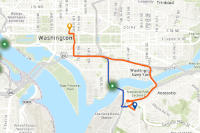

In [49]:
analyzed_bridges_item

In [52]:
analyzed_bridges_item.layers[0].query().df

,DATE,DT,EXTRA,FEDERAL,FUNDED,ITEM10,ITEM100,ITEM101,ITEM102,ITEM103,...,cbsa_impact_rank,cd_impact_rank,congressional_district,county,county_impact_rank,impairment_affected_commuters,impairment_affected_routes,impairment_impact_score,impairment_impedance_delta_sum,SHAPE
0,1202,,1,N,N,9999,0,N,3,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.10337200021758, 'y': 39.11935799987185}"
1,0403,,1,N,N,9999,0,L,1,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.21765799961696, 'y': 38.66366399989374}"
2,1202,,1,N,N,9999,0,N,2,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.23828300016027, 'y': 38.6813859996642}"
3,1202,,1,N,N,9999,0,N,2,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.18044700042867, 'y': 38.52673100023554}"
4,1202,,1,N,N,9999,0,N,3,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.1143389996451, 'y': 38.58010600019179}"
5,1202,,1,N,N,9999,0,N,2,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.17384700003896, 'y': 38.628681000028..."
6,1202,,1,N,N,9999,0,N,2,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.17027800002961, 'y': 38.67330300013339}"
7,1202,,1,N,N,9999,0,N,2,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.2355419996635, 'y': 38.714106000391666}"
8,1202,,1,N,N,9999,0,N,2,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.15158599959415, 'y': 38.70582499982396}"
9,1202,,1,N,N,9999,0,N,2,,...,None,None,None,None,None,None,None,None,None,"{'x': -78.15671100031238, 'y': 38.71942200002536}"


Map of Analyzed Bridges

In [48]:
analyzed_bridges_map = gis.map('Fairfax County', zoomlevel=8)
analyzed_bridges_map.basemap = 'gray-vector'
display(analyzed_bridges_map)
analyzed_bridges_map.add_layer(analyzed_bridges_item)

Map of Most Critical Bridge, with nominal commutes, and alternative commutes

In [55]:
most_critical_bridge_map = gis.map('Fairfax County', zoomlevel=8)
most_critical_bridge_map.basemap = 'gray-vector'
display(most_critical_bridge_map)
most_critical_bridge_map.add_layer(analyzed_bridges_item)

Map of Top Three Most Critical Bridges

In [56]:
topthree_bridges_map = gis.map('Fairfax County', zoomlevel=8)
topthree_bridges_map.basemap = 'gray-vector'
display(topthree_bridges_map)
topthree_bridges_map.add_layer(analyzed_bridges_item)

Group-by To Calculate Statistics by Groups (Top-five per Congressional District)

Now that we have rankings for each Congressional District, this takes me to the third notebook... 